In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.stats as stats
from sklearn.metrics import mutual_info_score
from scipy.stats.distributions import chi2
from scipy.special import gamma, gammaln
#import ruptures as rpt

In [4]:
from bocd import GaussianMean, GaussianNormalGamma, ConstantHazard, BOCD
from bocd.utils import generate_data_const_var, generate_data, plot_posterior

In [5]:
T = 1000           # Number of observations.
hazard = 1./100    # Constant prior on changepoint probability.
alpha0 = 1.          
beta0 = 0.5          
kappa0 = 0.5       
mu0 = 0.
data, cps = generate_data(alpha0, beta0, kappa0, mu0, T, hazard)

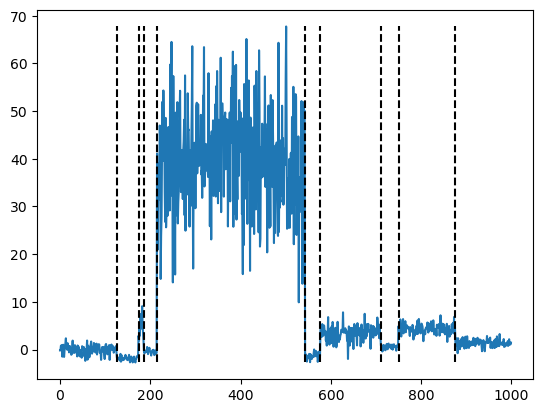

In [6]:
plt.plot(data)
plt.vlines(cps, np.min(data), np.max(data), linestyles = 'dashed', color = 'k')
plt.show()

In [30]:
T = 1000           # Number of observations.
hazard = 1./100.    # Constant prior on changepoint probability.
alpha0 = 1.          
beta0 = 0.5     
kappa0 = 1.       
mu0 = 0.

In [31]:
model = GaussianNormalGamma(alpha0, beta0, kappa0, mu0)
h = ConstantHazard(1/hazard)
bocd = BOCD(model, h)

In [32]:
# Iterate through data and detect changepoints
for x in data:
    #means.append(model.get_means())
    bocd.step(x)

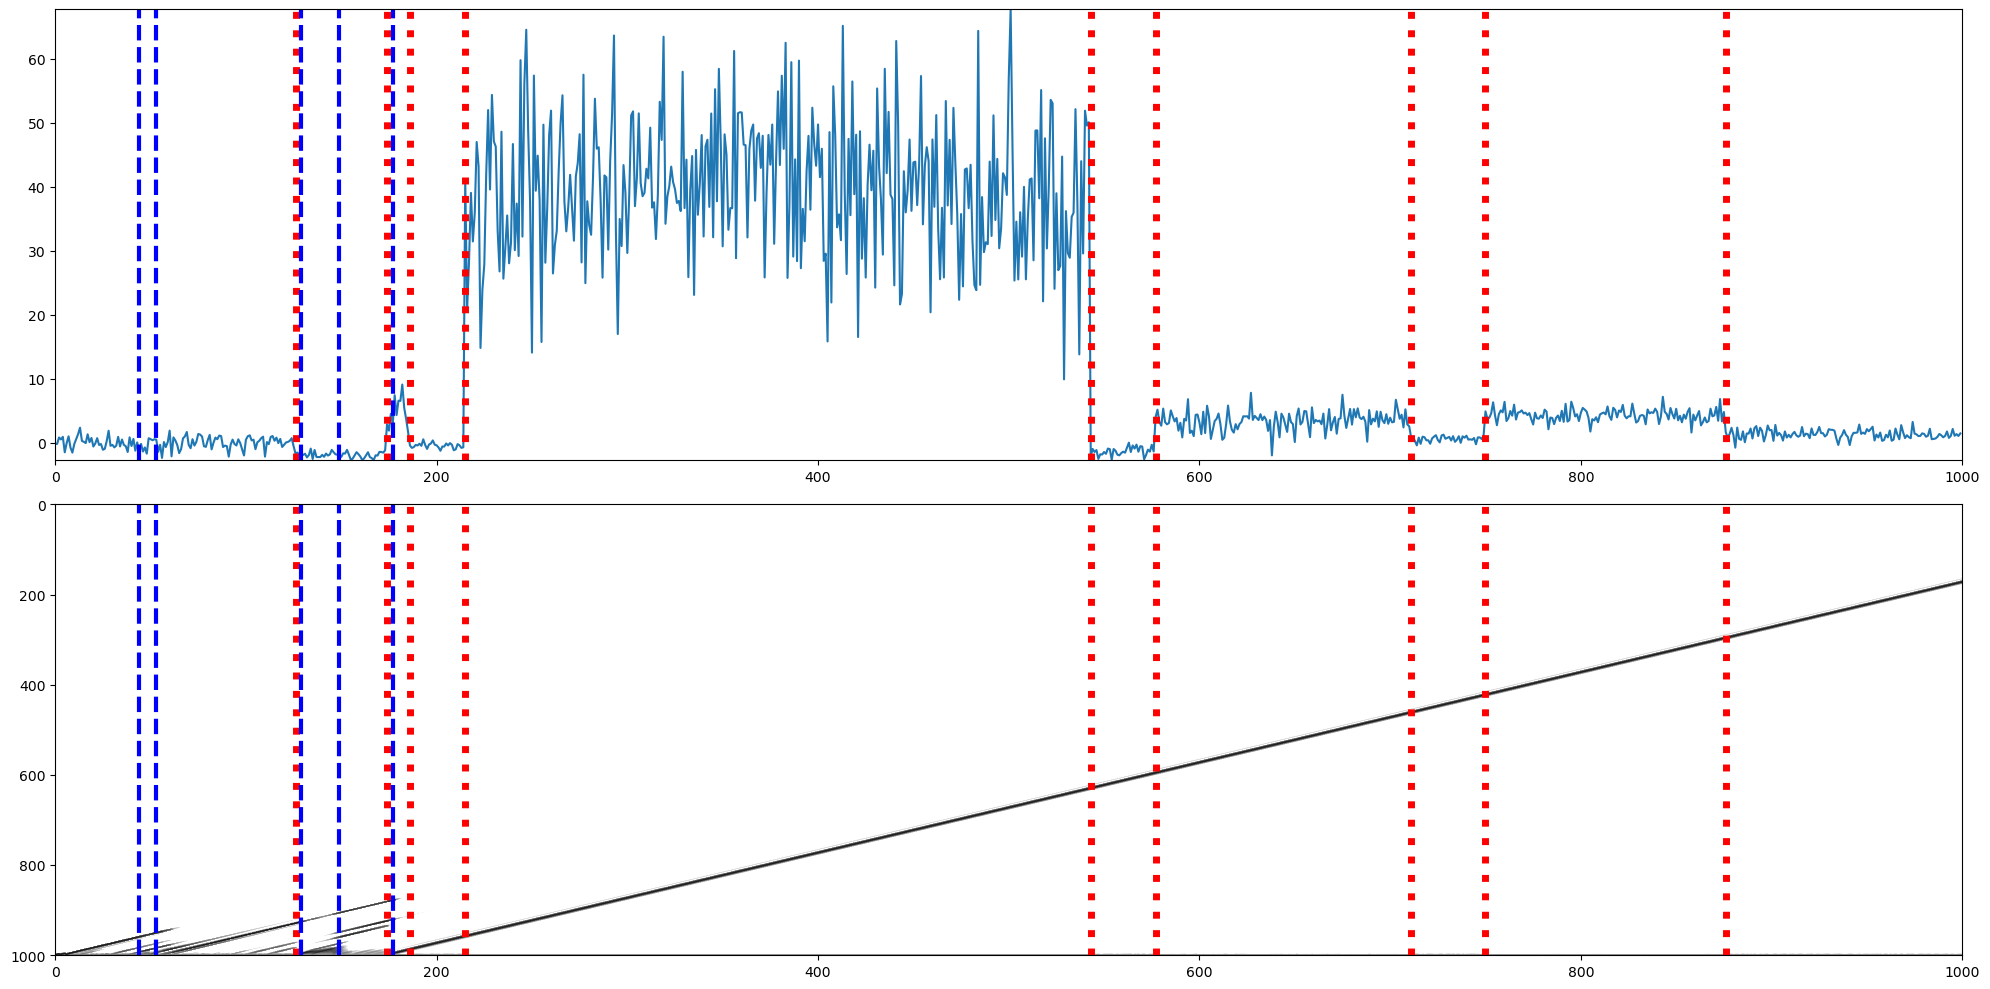

In [33]:
plot_posterior(T, data, cps, bocd)

In [11]:
mean0 = 0
var0 = 1.
varx = 1.

In [12]:
model = GaussianMean(mean0, var0, varx)
h = ConstantHazard(1/hazard)
bocd = BOCD(model, h)

In [13]:
# Iterate through data and detect changepoints
for x in data:
    #means.append(model.get_means())
    bocd.step(x)

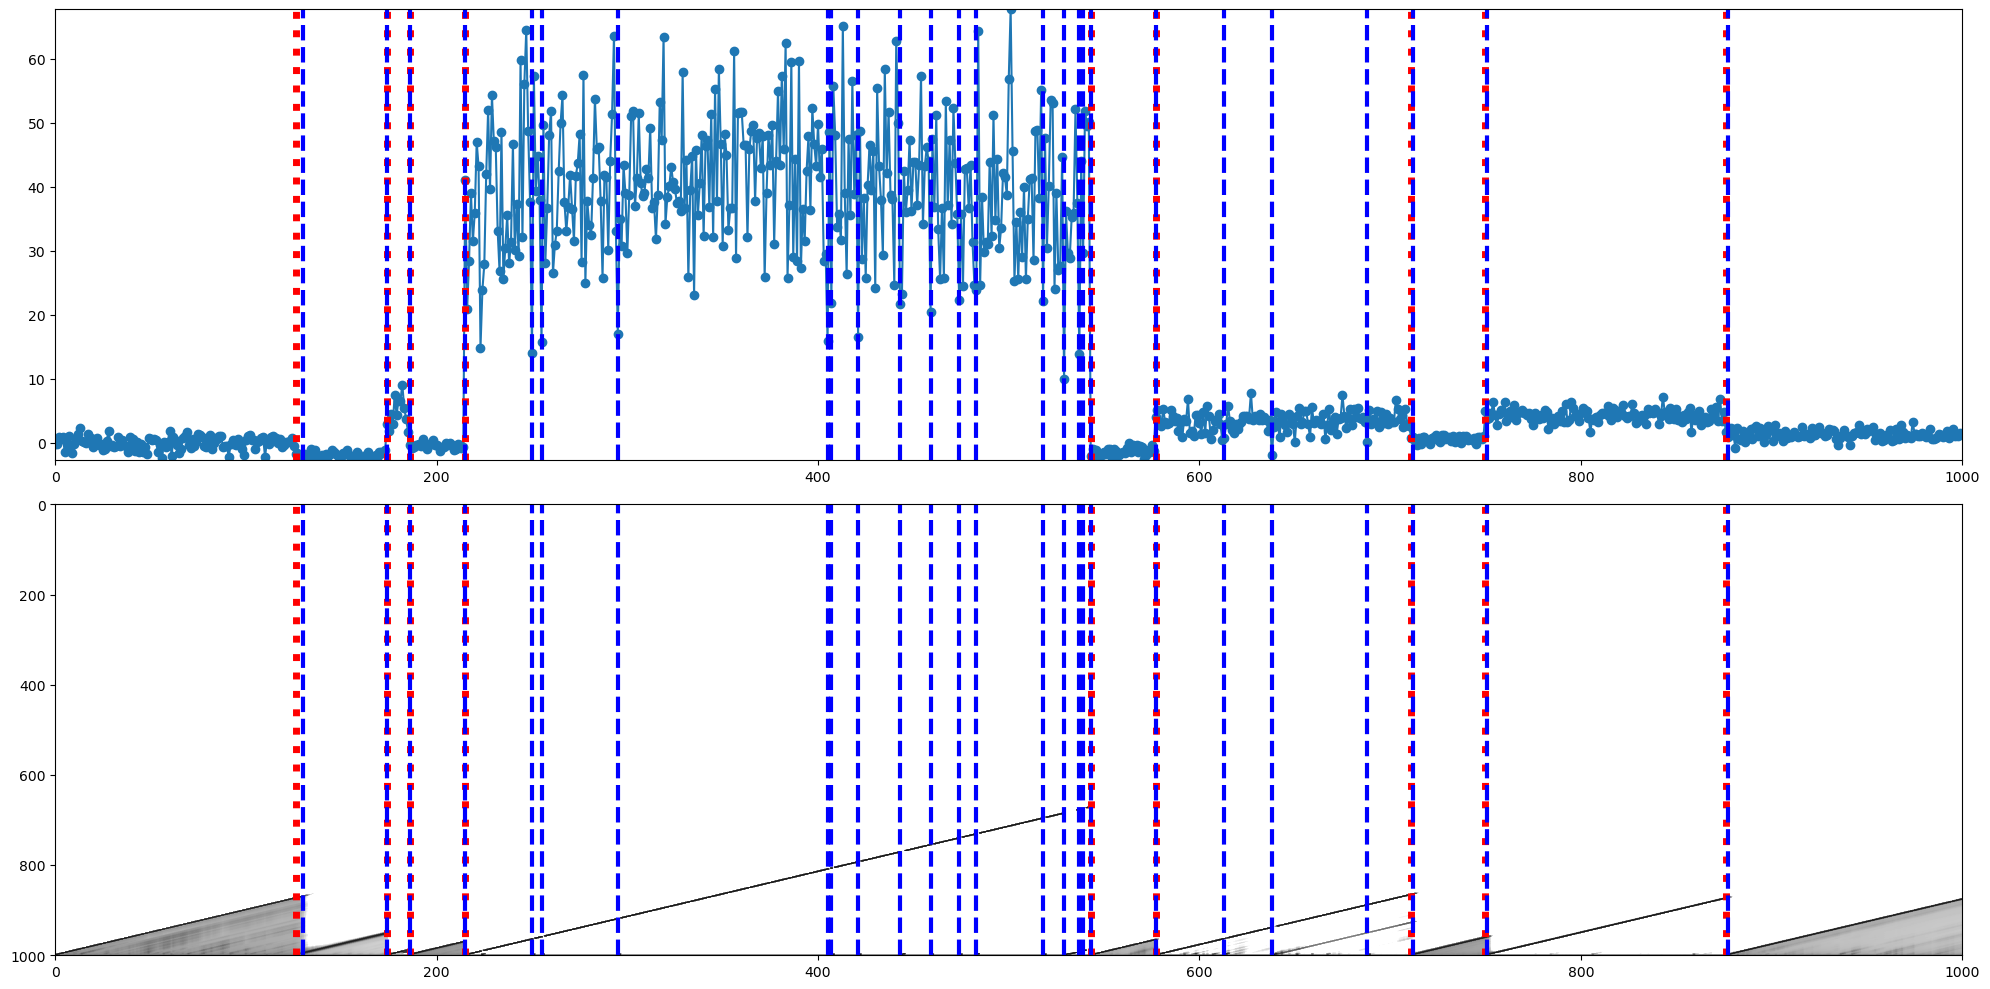

In [14]:
plot_posterior(T, data, cps, bocd)

In [ ]:
signal = np.array(data)

In [ ]:
fig, ax_array = rpt.display(signal, cps)

In [ ]:
algo = rpt.Pelt(model="rbf").fit(signal)
result = algo.predict(pen=10)

In [ ]:
rpt.display(signal, cps, result)
plt.show()

In [ ]:
# Iterate through data and detect changepoints
for x in data:
    bocd.step(x)

In [ ]:
plot_posterior(T, data, cps, bocd)

In [ ]:
def invchi2(x, nu, tausquared):
    prod = nu*tausquared
    factor = (nu/2)*(np.log(prod)-np.log(2))-gammaln(nu/2)-prod/(2*x)+(1+nu/2)*np.log(x)
    return np.exp(factor)

In [ ]:
invchi2(2, 1, 1)

In [ ]:
stats.norm(0,1).logpdf(2)

In [ ]:
chi